#
<h1 style="background: linear-gradient(to right, #000, #7509d2); color: white; font-style: italic; padding: 10px 20px; border-radius: 5px; text-align: center;">
    Depression Anxiety Stress Scales Responses
</h1>

<div style="text-align: center;">
    <img src="./psychology image.jpg" style="max-width: 100%; height: auto;">
</div>


The DASS is a measurement instrument that was developed with the aim of measuring depression, anxiety, and stress in people. It was created by Sydney and Peter Lovibond in the 1990s. <br>
This test was developed while researchers were looking for more accurate tools that could help measure not only depression and anxiety, but also stress.

The possible applications of this test are as follows:

- **Clinical research**: This test could help determine the persistence of depressive symptoms during or without treatment. <br>
- **Specific populations**: It can be used in work, educational, etc. settings to identify people who may benefit from further psychological assessment.

While the DASS measures depression, anxiety, and stress, one of the intriguing findings is how these three emotional states can overlap in the responses of individuals. However, the DASS is designed to identify the specific characteristics of each state. The scale has also been translated and adapted to numerous languages ​​and cultures, and has been validated in diverse international populations, making it a very versatile instrument. Interestingly, the DASS has found applications in the educational field of some countries, where it has been used to assess the emotional well-being of university students, providing valuable data for preventive and supportive mental health interventions.

The data used in this notebook was obtained from [Kaggle](https://www.kaggle.com/datasets/lucasgreenwell/depression-anxiety-stress-scales-responses?select=codebook.txt)

##
<h2 style="background: linear-gradient(to right, #000, #9b45e4); color: white; font-style: italic; padding: 10px 20px; border-radius: 5px; text-align: center;">
    💡 Hypothesis & Relevant questions 💡
</h2>

As a starting hypothesis we will take the following:
- The depression scale is correlated with the marital status of people
- Teenagers are the ones who present the most anxiety symptoms
- Religion determines the stress scales

Some interesting questions here are:
- Does the skilled hand correlate with stress?
- Which is the most depressive gender? And at what age?

##
<h2 style="background: linear-gradient(to right, #000, #9b45e4); color: white; font-style: italic; padding: 10px 20px; border-radius: 5px; text-align: center;">
    🗃️ Imports 🗃️
</h2>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def sshape(x):
    print(f"The dataframe has {x.shape[0]} rows & {x.shape[1]} columns")

##
<h2 style="background: linear-gradient(to right, #000, #9b45e4); color: white; font-style: italic; padding: 10px 20px; border-radius: 5px; text-align: center;">
    🔍 Data Collection 🔍
</h2>

In [3]:
df = pd.read_csv('../data/depression/data.csv', delimiter='\t')
df.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [4]:
print(f"We have a dataset of {df.shape[0]} rows and {df.shape[1]} columns")

We have a dataset of 39775 rows and 172 columns


In [5]:
df.describe().round(2)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.00,39775.00,39775.00,39775.00,39775.00,39775.00,39775.00,39775.00,39775.00,39775.00,...,39775.00,39775.00,39775.0,39775.00,39775.00,39775.00,39775.00,39775.00,39775.00,39775.00
mean,2.62,21.56,6970.59,2.17,21.25,5332.38,2.23,21.58,7426.45,1.95,...,23.61,1.27,1.2,1.14,7.56,1.64,31.31,1.71,1.16,3.51
std,1.03,12.13,86705.13,1.11,12.13,26513.61,1.04,12.12,158702.35,1.04,...,21.58,0.45,0.4,0.40,3.55,1.35,25.87,0.47,0.45,2.14
min,1.00,1.00,180.00,1.00,1.00,176.00,1.00,1.00,-10814.00,1.00,...,13.00,1.00,1.0,0.00,0.00,0.00,10.00,0.00,0.00,0.00
25%,2.00,11.00,2664.00,1.00,11.00,2477.00,1.00,11.00,2857.00,1.00,...,18.00,1.00,1.0,1.00,4.00,1.00,10.00,1.00,1.00,2.00
50%,3.00,22.00,3609.00,2.00,21.00,3511.00,2.00,22.00,3898.00,2.00,...,21.00,1.00,1.0,1.00,10.00,1.00,10.00,2.00,1.00,3.00
75%,4.00,32.00,5358.00,3.00,32.00,5216.00,3.00,32.00,5766.00,3.00,...,25.00,2.00,1.0,1.00,10.00,2.00,60.00,2.00,1.00,4.00
max,4.00,42.00,12102282.00,4.00,42.00,2161057.00,4.00,42.00,28582689.00,4.00,...,1998.00,2.00,2.0,3.00,12.00,5.00,70.00,2.00,3.00,133.00


In [6]:
df.isnull().sum()

Q1A               0
Q1I               0
Q1E               0
Q2A               0
Q2I               0
              ...  
race              0
voted             0
married           0
familysize        0
major         11425
Length: 172, dtype: int64

Note the presence of outliers in the dataset. <br>
The minimum value of the column `Q3E`, for example, is unusual, as it is a large negative value. This value should be investigated further. <br>
Also, the maximum value of the column `age` is 1998, which is impossible and should be treated individually.

##
<h2 style="background: linear-gradient(to right, #000, #9b45e4); color: white; font-style: italic; padding: 10px 20px; border-radius: 5px; text-align: center;">
    ⚙️ Data Manipulation ⚙️
</h2>

As in the questionnaire there are some questions that help us to determine the validity of an answer we can start from there and filter the valid answers only 

In [7]:
df2 = df        #df2 will be the dataframe copy that we are going to use to perform the EDA 
total = 0
for i in [6, 9, 12]:
    q = 'VCL'+ str(i)
    n = df.loc[df[q] == 1].index.shape[0]
    print(f"{n} registers will be deleted")
    df2 = df2.drop(df2.loc[df[q] == 1].index, axis=0) 
    total += n
print(f"{total} registers were deleted due to the validity check")

1598 registers will be deleted
1716 registers will be deleted
3352 registers will be deleted
6666 registers were deleted due to the validity check


In [8]:
sshape(df2)

The dataframe has 34583 rows & 172 columns


Now let's separate the columns that we will use for the EDA

In [9]:
exclude = [f'Q{i}A' for i in range(1,43)]
exclude.extend([f'Q{i}I' for i in range(1,43)])
exclude.extend([f'Q{i}E' for i in range(1,43)])

exclude.extend([f'VCL{i}' for i in range(1, 17)])

# We'll let the Ten Item Personality Inventory for a later analysis
exclude.extend([f'TIPI{i}' for i in range(1,11)])

exclude.extend(['engnat', 'screensize', 'uniquenetworklocation', 'voted'])

df2 = df2.drop(columns=exclude, axis=1)
df2

,country,source,introelapse,testelapse,surveyelapse,education,urban,gender,age,hand,religion,orientation,race,married,familysize,major
0,IN,2,19,167,166,2,3,2,16,1,12,1,10,1,2,NaN
1,US,2,1,193,186,2,3,2,16,2,7,0,70,1,4,NaN
2,PL,2,5,271,122,2,3,2,17,1,4,3,60,1,3,NaN
3,US,2,3,261,336,1,3,2,13,2,4,5,70,1,5,biology
4,MY,2,1766,164,157,3,2,2,19,3,10,1,10,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,US,2,2,300,234,1,2,2,16,1,1,1,70,1,3,NaN
39770,GB,2,7,143,66,2,2,1,16,1,2,4,60,1,2,NaN
39772,US,0,12,246,257,3,2,2,48,1,7,1,30,2,3,Computer Science
39773,US,2,2,174,113,3,2,2,20,1,6,1,60,1,2,History


### 
<h2 style="color: #444; border-bottom: 2px solid #9b45e4; padding-bottom: 5px; text-align: center;">
    Transform
</h2>


We need to transform some data, since for example a "gender" of 1 is not very detailed for us.

In [10]:
#First we have to cast the dtypes to adjust the new ones
df2.astype({
    'education': 'string',
    'urban': 'string',
    'gender': 'string',
    'hand': 'string',
    'religion': 'string',
    'orientation': 'string',
    'married': 'string',
})

#Education
grades = ['Less than High School', 'High School', 'University', 'Graduate']

for i in range(1, 5):
    df2.loc[df2.education == i, 'education'] = grades[i-1]
#Urban
utypes = ['Rural', 'Suburban', 'Urban']

for i in range(1, 4):
    df2.loc[df2.urban == i, 'urban'] = utypes[i-1]

#Gender
genders = ['Male', 'Female', 'Other']

for i in range (1, 4):
    df2.loc[df2.gender == i, 'gender'] = genders[i-1]

#Hand
hands = ['right', 'left', 'both']

for i in range(1, 4):
    df2.loc[df2.hand == i, 'hand'] = hands[i-1]

#Religion
religions = ['Agnostic','Atheist','Buddhist','Catholic','Mormon','Protestant','Christian','Hindu','Jewish', 'Muslim', 'Sikh', 'Other']

for i in range(1, 13):
    df2.loc[df2.religion == i, 'religion'] = religions[i-1] 

#Orientation
orients = ['Heterosexual', 'Bisexual', 'Homosexual', 'Asexual', 'Other']

for i in range(1, 6):
    df2.loc[df2.orientation == i, 'orientation'] = orients[i-1]

#Married
marital = ['Never married', 'Currently married', 'Previously married']

for i in range (1, 4):
    df2.loc[df.married == i, 'married'] = marital[i-1]

df2

C:\Users\josea\AppData\Local\Temp\ipykernel_26280\837269602.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Less than High School' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2.education == i, 'education'] = grades[i-1]
C:\Users\josea\AppData\Local\Temp\ipykernel_26280\837269602.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Rural' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2.urban == i, 'urban'] = utypes[i-1]
C:\Users\josea\AppData\Local\Temp\ipykernel_26280\837269602.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc

,country,source,introelapse,testelapse,surveyelapse,education,urban,gender,age,hand,religion,orientation,race,married,familysize,major
0,IN,2,19,167,166,High School,Urban,Female,16,right,Other,Heterosexual,10,Never married,2,NaN
1,US,2,1,193,186,High School,Urban,Female,16,left,Christian,0,70,Never married,4,NaN
2,PL,2,5,271,122,High School,Urban,Female,17,right,Catholic,Homosexual,60,Never married,3,NaN
3,US,2,3,261,336,Less than High School,Urban,Female,13,left,Catholic,Other,70,Never married,5,biology
4,MY,2,1766,164,157,University,Suburban,Female,19,both,Muslim,Heterosexual,10,Never married,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,US,2,2,300,234,Less than High School,Suburban,Female,16,right,Agnostic,Heterosexual,70,Never married,3,NaN
39770,GB,2,7,143,66,High School,Suburban,Male,16,right,Atheist,Asexual,60,Never married,2,NaN
39772,US,0,12,246,257,University,Suburban,Female,48,right,Christian,Heterosexual,30,Currently married,3,Computer Science
39773,US,2,2,174,113,University,Suburban,Female,20,right,Protestant,Heterosexual,60,Never married,2,History


Now we need to check the values ​​in each column to avoid outliers or bad data. <br>
The columns we are interested in here are `age` and `familysize` because of the possibility of typos.

In [11]:
df2.describe()

,source,introelapse,testelapse,surveyelapse,age,race,familysize
count,34583.000000,3.458300e+04,3.458300e+04,3.458300e+04,34583.000000,34583.000000,34583.000000
mean,0.884625,2.686741e+03,2.902788e+03,4.888515e+03,23.527542,30.029205,3.557817
std,0.788957,1.482567e+05,1.579338e+05,1.921872e+05,22.818171,25.689312,2.117563
min,0.000000,0.000000e+00,1.200000e+01,1.000000e+00,13.000000,10.000000,0.000000
25%,0.000000,4.000000e+00,1.680000e+02,1.470000e+02,18.000000,10.000000,2.000000
50%,1.000000,7.000000e+00,2.170000e+02,1.880000e+02,21.000000,10.000000,3.000000
75%,2.000000,2.100000e+01,3.000000e+02,2.500000e+02,25.000000,60.000000,5.000000
max,2.000000,2.082974e+07,2.082972e+07,2.082845e+07,1998.000000,70.000000,133.000000


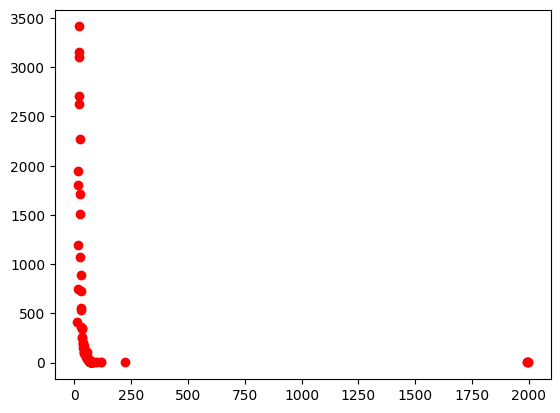

In [12]:
#First lets take a look over each of these columns
x = df2.age.value_counts().index
y = df2.age.value_counts().values

plt.plot(x, y, 'o', color='red')

Here we see that there are some rare values ​​like a person who is about **2000** years old or another who is about **250** years old, which seems impossible and will affect our analysis and models. <br>
Therefore, we will only take values ​​less than 90 years old, which seems to be a more appropriate value for the age limit.

In [13]:
len(df2.loc[df.age >= 90])

8

Great! We only have 8 outliers, the dataset won't be greatly affected if we drop them.

In [14]:
df2 = df2.drop(df2.loc[df.age >= 90].index, axis=0)
df2.describe()

,source,introelapse,testelapse,surveyelapse,age,race,familysize
count,34575.000000,3.457500e+04,3.457500e+04,3.457500e+04,34575.000000,34575.000000,34575.000000
mean,0.884657,2.687355e+03,2.903402e+03,4.889597e+03,23.286218,30.030369,3.554071
std,0.788944,1.482738e+05,1.579521e+05,1.922094e+05,8.335484,25.689693,2.000019
min,0.000000,0.000000e+00,1.200000e+01,1.000000e+00,13.000000,10.000000,0.000000
25%,0.000000,4.000000e+00,1.680000e+02,1.470000e+02,18.000000,10.000000,2.000000
50%,1.000000,7.000000e+00,2.170000e+02,1.880000e+02,21.000000,10.000000,3.000000
75%,2.000000,2.100000e+01,3.000000e+02,2.500000e+02,25.000000,60.000000,5.000000
max,2.000000,2.082974e+07,2.082972e+07,2.082845e+07,89.000000,70.000000,99.000000


Now, let's see the "new" values obtained after treating the column propperly

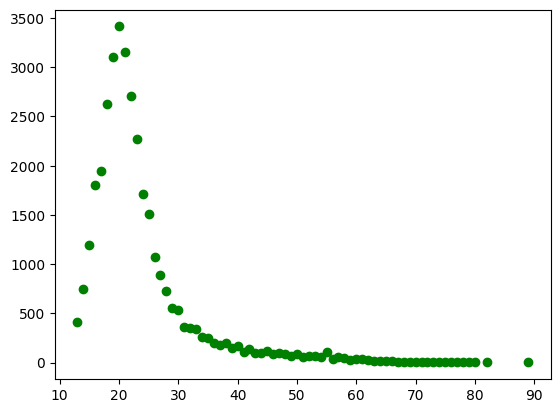

In [15]:
x = df2.age.value_counts().index
y = df2.age.value_counts().values

plt.plot(x, y, 'o', color='green')

Much better <br>
**From the graph we can se that the questionnaire was answered majoritly by people over the 20's**

<br>
Now let's tread the second column `familysize` due to the presence of an outlier which can be loudous in the analysis

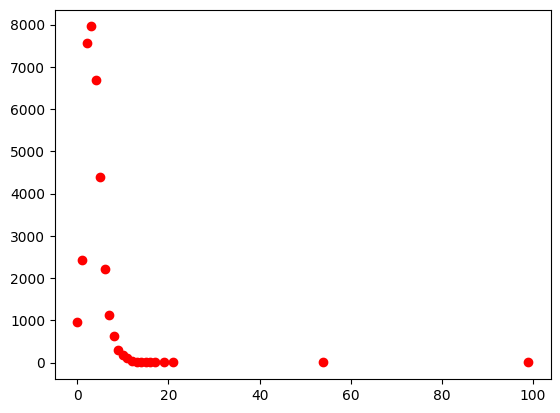

In [16]:
x = df2.familysize.value_counts().index
y = df2.familysize.value_counts().values

plt.plot(x, y, 'o', color='red')

Hmmm...<br>
There ar some values that are no common...<br>
Near to 50 children OF THE SAME WOMAN. That's incredible! But even more incredible is have 100 children of her own<br>
WHAAAT????

Is no common that a woman have 100 children so we will not take them on mind in our analysis.

In [17]:
df2 = df2.drop(df2.loc[df2.familysize > 40].index, axis=0)

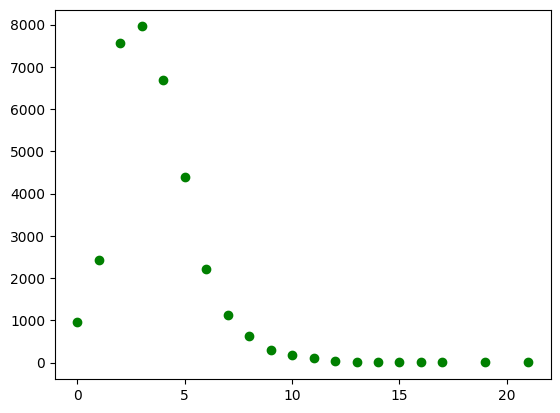

In [18]:
x = df2.familysize.value_counts().index
y = df2.familysize.value_counts().values

plt.plot(x, y, 'o', color='green')

In [19]:
df2.familysize.describe()

count    34573.000000
mean         3.549851
std          1.913943
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: familysize, dtype: float64

Above we can se that the majority of the families are from 1 to 5 children formed which sounds to be a much more regular situation

In [20]:
df2

,country,source,introelapse,testelapse,surveyelapse,education,urban,gender,age,hand,religion,orientation,race,married,familysize,major
0,IN,2,19,167,166,High School,Urban,Female,16,right,Other,Heterosexual,10,Never married,2,NaN
1,US,2,1,193,186,High School,Urban,Female,16,left,Christian,0,70,Never married,4,NaN
2,PL,2,5,271,122,High School,Urban,Female,17,right,Catholic,Homosexual,60,Never married,3,NaN
3,US,2,3,261,336,Less than High School,Urban,Female,13,left,Catholic,Other,70,Never married,5,biology
4,MY,2,1766,164,157,University,Suburban,Female,19,both,Muslim,Heterosexual,10,Never married,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,US,2,2,300,234,Less than High School,Suburban,Female,16,right,Agnostic,Heterosexual,70,Never married,3,NaN
39770,GB,2,7,143,66,High School,Suburban,Male,16,right,Atheist,Asexual,60,Never married,2,NaN
39772,US,0,12,246,257,University,Suburban,Female,48,right,Christian,Heterosexual,30,Currently married,3,Computer Science
39773,US,2,2,174,113,University,Suburban,Female,20,right,Protestant,Heterosexual,60,Never married,2,History


In [21]:
df2.education.value_counts()

education
University               13367
High School              13014
Graduate                  4378
Less than High School     3387
0                          427
Name: count, dtype: int64

0 is not a valid value for this column, but due to the scale taken we can assume them to be part of the "Less than High School" group 

In [22]:
df2.loc[df2.education == 0, 'education'] = 'Less than High School' 
df2.education.value_counts()

education
University               13367
High School              13014
Graduate                  4378
Less than High School     3814
Name: count, dtype: int64

Perfect, let's move onto the next column

In [23]:
df2.urban.value_counts()

urban
Urban       15663
Suburban    11317
Rural        7249
0             344
Name: count, dtype: int64

Again, the scale helps us to do assumptions over the people who did a typo in them answers

In [24]:
df2.loc[df.urban == 0, 'urban'] = 'Rural'
df2.urban.value_counts()

urban
Urban       15663
Suburban    11317
Rural        7593
Name: count, dtype: int64

In [25]:
df2.gender.value_counts()

gender
Female    26673
Male       7398
Other       440
0            62
Name: count, dtype: int64

In this case, we cannot make assumptions over the scale of the answer code, but we can say that the gender of that people is not known and therefore, we can put them in the *Other* group

In [26]:
df2.loc[df2.gender == 0, 'gender'] = 'Other'
df2.gender.value_counts()

gender
Female    26673
Male       7398
Other       502
Name: count, dtype: int64

In [27]:
df2.hand.value_counts()

hand
right    30341
left      3615
both       467
0          150
Name: count, dtype: int64

Now we have a problem with this values, since there's no way to add to any group the value 0.<br>
But we can solve it by creating a new group `Unknown` for those rows where 0 was found

In [28]:
df2.loc[df2.hand == 0, 'hand'] = 'Unknown'
df2.hand.value_counts()

hand
right      30341
left        3615
both         467
Unknown      150
Name: count, dtype: int64

In [29]:
df2.orientation.value_counts()

orientation
Heterosexual    21169
Bisexual         4122
Other            3060
0                2878
Asexual          1719
Homosexual       1625
Name: count, dtype: int64

In this case we do can add the rows where 0 was found to the category `Other`

In [30]:
df2.loc[df2.orientation == 0, 'orientation'] = 'Other'
df2.orientation.value_counts()

orientation
Heterosexual    21169
Other            5938
Bisexual         4122
Asexual          1719
Homosexual       1625
Name: count, dtype: int64

In [31]:
df2 = df2.fillna({'major': 'Unknown'})

In [32]:
df2.married.value_counts()

married
Never married         29823
Currently married      3709
Previously married      859
0                       182
Name: count, dtype: int64

In [33]:
df2.loc[df2.married == 0, 'married'] = 'Unknown'
df2.married.value_counts()

married
Never married         29823
Currently married      3709
Previously married      859
Unknown                 182
Name: count, dtype: int64

##
<h2 style="background: linear-gradient(to right, #000, #9b45e4); color: white; font-style: italic; padding: 10px 20px; border-radius: 5px; text-align: center;">
    📊 Exploratory Data Analysis 📊
</h2>

We do not yet have the “diagnoses” of the people, in order to obtain them we have to do certain operations as the DASS protocol says, but in first instance let's visualize the data that we do have

In [34]:
plt.style.use('seaborn-v0_8-notebook')

Before we start with the EDA, let's see a last time the dataframe

In [35]:
df2

,country,source,introelapse,testelapse,surveyelapse,education,urban,gender,age,hand,religion,orientation,race,married,familysize,major
0,IN,2,19,167,166,High School,Urban,Female,16,right,Other,Heterosexual,10,Never married,2,Unknown
1,US,2,1,193,186,High School,Urban,Female,16,left,Christian,Other,70,Never married,4,Unknown
2,PL,2,5,271,122,High School,Urban,Female,17,right,Catholic,Homosexual,60,Never married,3,Unknown
3,US,2,3,261,336,Less than High School,Urban,Female,13,left,Catholic,Other,70,Never married,5,biology
4,MY,2,1766,164,157,University,Suburban,Female,19,both,Muslim,Heterosexual,10,Never married,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,US,2,2,300,234,Less than High School,Suburban,Female,16,right,Agnostic,Heterosexual,70,Never married,3,Unknown
39770,GB,2,7,143,66,High School,Suburban,Male,16,right,Atheist,Asexual,60,Never married,2,Unknown
39772,US,0,12,246,257,University,Suburban,Female,48,right,Christian,Heterosexual,30,Currently married,3,Computer Science
39773,US,2,2,174,113,University,Suburban,Female,20,right,Protestant,Heterosexual,60,Never married,2,History


Text(0.5, 1.0, "People's marital status")

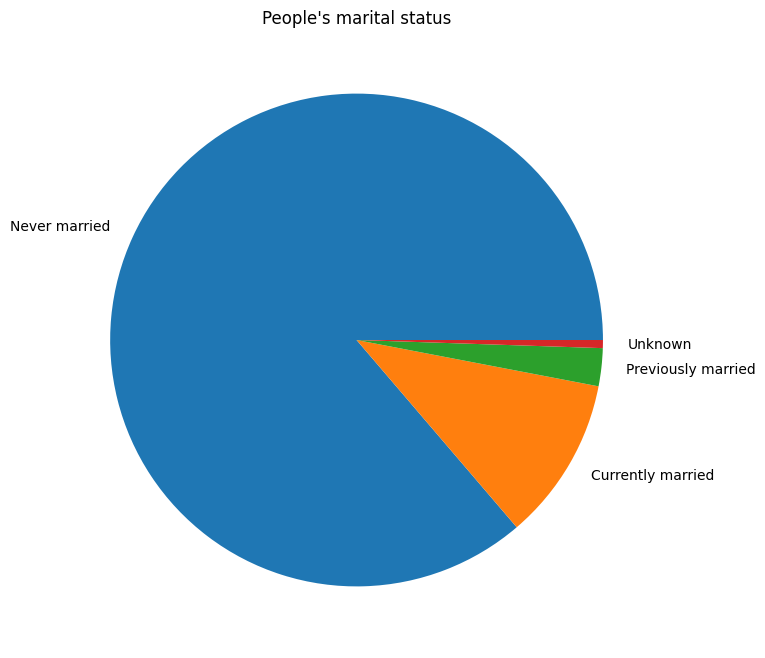

In [98]:
# First let's see the proportions of marital statuses (hypothesis 1)

fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.pie(df2.married.value_counts().values, labels=df2.married.value_counts().index)
plt.title("People's marital status")

Text(0, 0.5, 'Count')

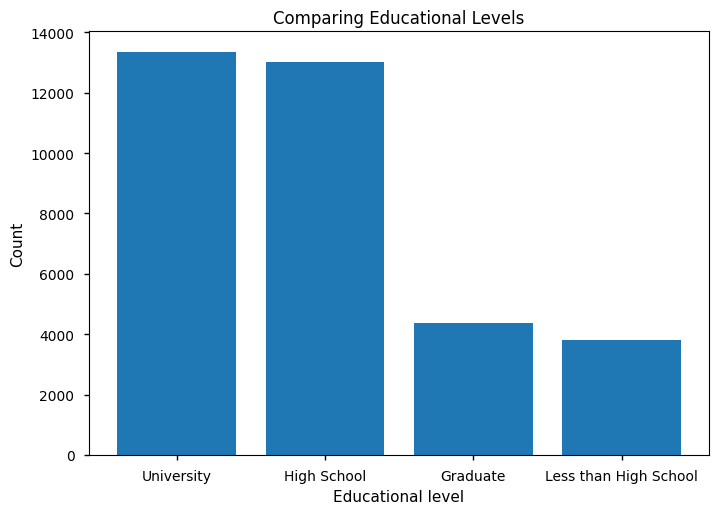

In [77]:
x = df2.education.value_counts().index
y = df2.education.value_counts().values

plt.bar(x, y)
plt.title("Comparing Educational Levels")
plt.xlabel("Educational level")
plt.ylabel("Count")

Text(0.5, 0, 'Age (years)')

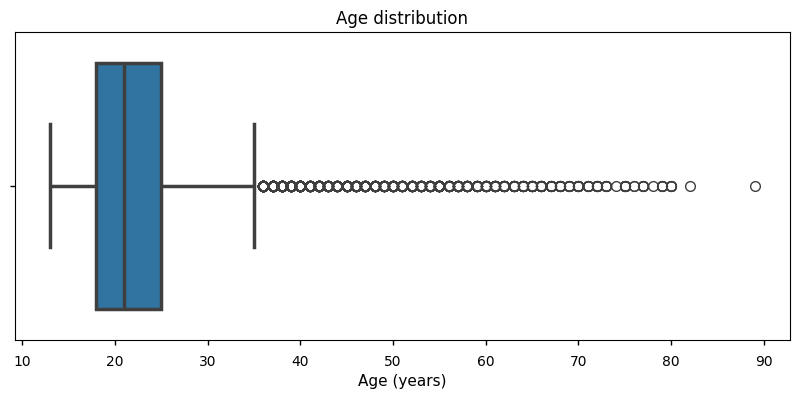

In [58]:
#Now let's see the distribution of ages of people who answered the questionnaire (hypothesis 2)

#plt.plot(df2.age.value_counts().index, df2.age.value_counts().values, 'o', color= 'purple')
#plt.title("Age distribution")
#print(df2.age.value_counts())
#plt.boxplot(x=df2.age.value_counts().index, vert=False)
#plt.legend()
plt.figure(figsize=(10,4))
plt.title("Age distribution")
sns.boxplot(x='age', data=df2, linewidth=2.5)
plt.xlabel("Age (years)")

Text(0.5, 1.0, 'Portion of people who lives in certain types of settlement')

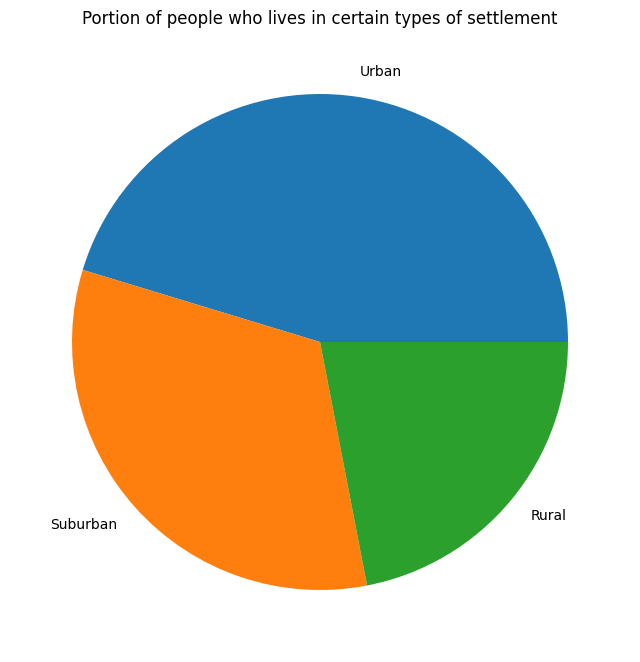

In [94]:
plt.figure(figsize=(8, 10))
plt.pie(df2.urban.value_counts().values, labels=df2.urban.value_counts().index)
plt.title("Portion of people who lives in certain types of settlement")

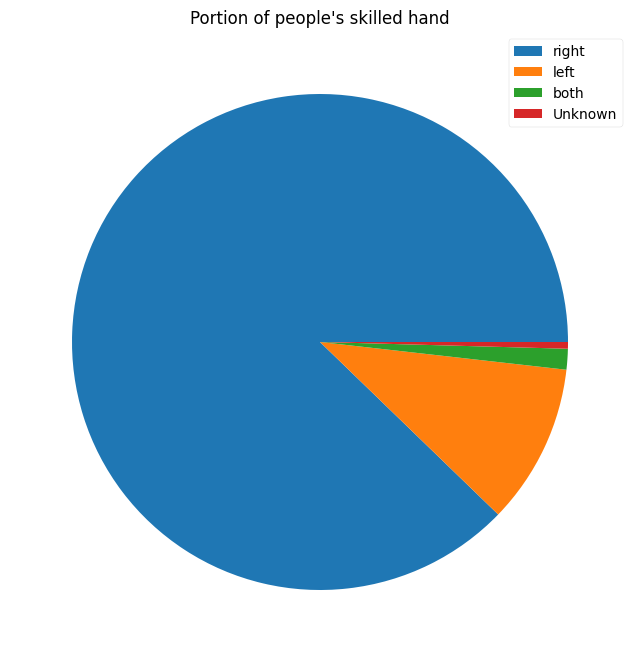

In [92]:
# Interesting question 1

plt.figure(figsize=(8, 10))
plt.pie(df2.hand.value_counts().values)
plt.title("Portion of people's skilled hand")
plt.legend(df2.hand.value_counts().index)

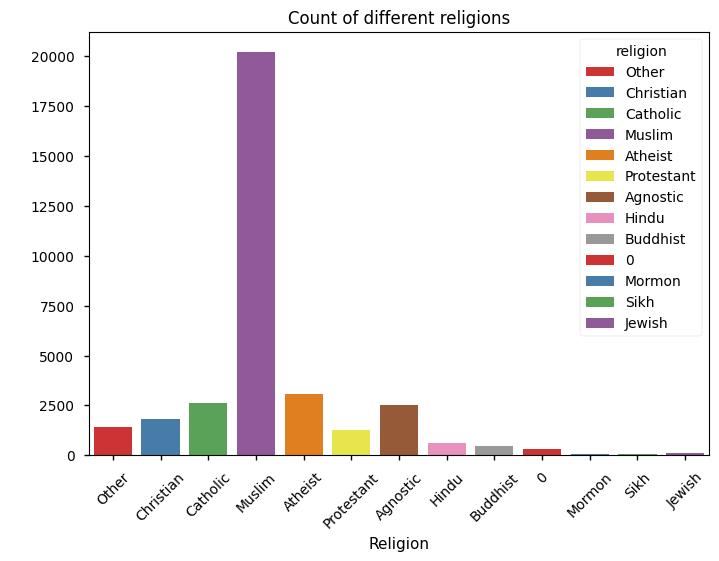

In [70]:
# Now let's examine the different religions (hypothesis 3)
sns.countplot(x='religion', data=df2, palette='Set1', hue='religion')

plt.title('Count of different religions')
plt.xlabel('Religion')
plt.ylabel(' ')
plt.xticks(rotation=45)  # Rotar las etiquetas si es necesario
plt.show()

Text(0, 0.5, ' ')

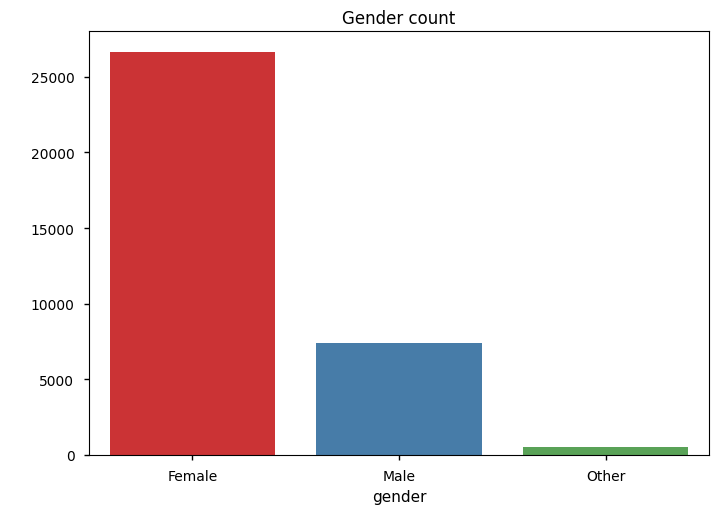

In [74]:
# Interesting question 2
sns.countplot(x='gender', data=df2, palette= 'Set1', hue='gender')
plt.title("Gender count")
plt.ylabel(' ')

Training some model to get knowledge using the gender as a feature, will produce significant errors since the data is not balanced

<Axes: title={'center': 'Gender distributions per age'}, xlabel='gender', ylabel='age'>

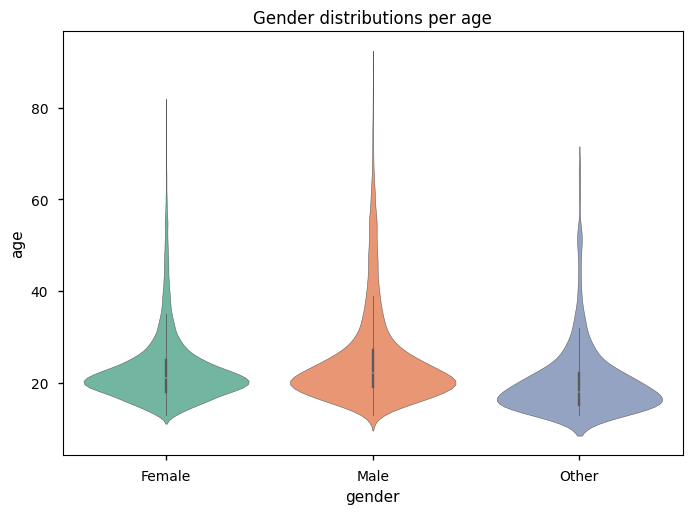

In [97]:
# Interesting question 2
plt.title("Gender distributions per age")
sns.violinplot(x='gender', y='age', data=df2, palette='Set2', hue='gender')

Using this plot we can see not only the distribution but also the density of the data
For example, from this graph we have that males are older (due to the density of the violin) than the females questioned